# AEROSP 520 Compressible Flow: Homework 6
Jason Chen

## Problem 3
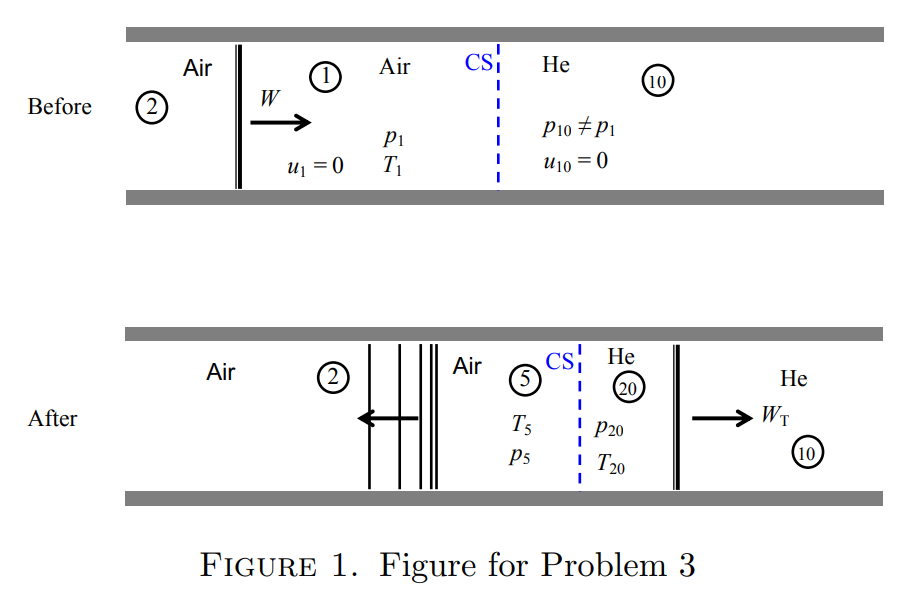

Assume region (1) contains air at $p_1 = 50 \textrm{ Torr}$ and $T_1 = 300 \textrm{ K}$, and region (1) contains helium at $p_{10} = 25 \textrm{ Torr}$ and $T_{10} = 300 \textrm{ K}$. The speed of the primary shock is initially $W = 1000 \textrm{ m/s}$.

### Part (a)
Prompt: *Indicate what are the conditions across the contact surface that define regions 5 and 20, and hence the final solution of the problem.*

As with any material discontinuity, the velocity magnitude and static pressure on either side of the boundary must be equal, or else there would be transport across the boundary. Thus:
$$
\boxed{u_5 = u_{20}, \textrm{ } p_5 = p_{20}}
$$

### Part (b)
Prompt: *Find the pressure, temperature and speed behind the secondary moving shock.*

We are interested in the properties at region 20, after $W_T$. However, since we do not know the properties of $W_T$, our solution strategy will be to solve for the LHS of the resultant contact surface (CS) to then solve for region 20. Since we know that region 5 is the result of firstly region 1 being shocked by the incident wave $W$ (resulting in region 2) and then expanded, we will initially solve for the properties of region 2. Since $W$ is a moving shock, we can shift our reference frame to that of the moving shock such that it is stationary, and it is as if there is a $1000 \textrm{ m/s}$ flow (of region 1) shocking and gaining static pressure and temperature as it transforms to region 2.

Thus, we can use the elementary shock jump relations to solve for region 2. The Mach number of the "flow" in region 1 is:
$$
M_1 = \frac{W}{a_1} = \frac{W}{\sqrt{\gamma R T_1}}
$$
This assumes a CPG, which is valid at these moderate temperatures and pressures. We will use $\gamma = 1.4$ and $R = 287 \textrm{ J/kg/K}$ for air. Then, we can find the static pressure jump in region 2:
$$
\frac{p_2}{p_1} = \frac{2\gamma M_1^2 - (\gamma-1)}{\gamma + 1}
$$
From the Rankine-Hugoniot relations (from mass, momentum, and energy conservation across a moving shock) for a CPG, we can also get the density and temperature ratios:
$$
\frac{\rho_2}{\rho_1}=\frac{p_2}{p_1}\frac{T_1}{T_2}=\frac{1+\frac{\gamma+1}{\gamma-1}\frac{p_2}{p_1}}{\frac{\gamma+1}{\gamma-1}+\frac{p_2}{p_1}}
$$
$$
\frac{T_2}{T_1}=\frac{p_2}{p_1}\left[\frac{\frac{\gamma+1}{\gamma-1}+\frac{p_2}{p_1}}{1+\frac{\gamma+1}{\gamma-1}\frac{p_2}{p_1}}\right]
$$
This allows us to then solve for the piston velocity $u_p$, i.e. the induced flow velocity in region 2 after the shock as passed:
$$
u_p = u_2 = W\left(1-\frac{\rho_1}{\rho_2}\right)=\frac{a_1}{\gamma}\left(\frac{p_2}{p_1}-1\right)\left[\frac{\frac{2\gamma}{\gamma+1}}{\frac{p_2}{p_1}+\frac{\gamma-1}{\gamma+1}}\right]^{1/2}
$$


In [3]:
import numpy as np
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity

# Given/known constants as quantities
p1 = Q_(50.0, 'torr')           # Static pressure in region 1
T1 = Q_(300.0, 'kelvin')        # Temperature in region 1
W = Q_(1000.0, 'meter/second')  # Primary shock speed
gamma = 1.4
R = Q_(287.0, 'J/kg/K')
a1 = np.sqrt(gamma * R * T1)
M1 = (W / a1).to_base_units().magnitude

# Pressure ratio across the moving shock
p2_over_p1 = (2 * gamma * M1**2 - (gamma - 1)) / (gamma + 1)
# Temperature ratio from Rankine-Hugoniot
ratio_term = (gamma + 1)/(gamma - 1)
T2_over_T1 = p2_over_p1 * ((ratio_term + p2_over_p1)/(1 + ratio_term * p2_over_p1))
# Density ratio using p/(rho T)
rho2_over_rho1 = p2_over_p1/T2_over_T1

# Piston/induced flow velocity (region 2) from two equivalent forms
u_p = (W * (1 - 1/rho2_over_rho1))
u_p_closed = a1 * (2 / (gamma + 1)) * ((M1**2 - 1) / M1)

print(f"a1: {a1.m_as('m/s'):.3f} m/s")
print(f"M1: {M1:.3f}")
print(f"p2/p1: {p2_over_p1:.3f}")
print(f"T2/T1: {T2_over_T1:.3f}")
print(f"rho2/rho1: {rho2_over_rho1:.3f}")
print(f"u_p: {u_p.m_as('m/s'):.3f} m/s")
print(f"u_p (closed-form check): {u_p_closed.m_as('m/s'):.3f} m/s")

a1: 347.189 m/s
M1: 2.880
p2/p1: 9.512
T2/T1: 2.541
rho2/rho1: 3.744
u_p: 732.883 m/s
u_p (closed-form check): 732.883 m/s
